In [1]:
import torch
import torch.nn as nn
from torchvision.models import vgg16

In [2]:
def decom_vgg16():
    # https://github.com/chenyuntc/simple-faster-rcnn-pytorch/blob/0.4/model/faster_rcnn_vgg16.py#L12
    # the 30th layer of features is relu of conv5_3
    if False: # opt.caffe_pretrain = False
        model = vgg16(pretrained=False)
        if not opt.load_path:
            model.load_state_dict(torch.load(opt.caffe_pretrain_path))
    else:
        model = vgg16(pretrained=False)

    features = list(model.features)[:30]
    classifier = model.classifier

    classifier = list(classifier)
    del classifier[6] #del output
    if not False: # opt.use_drop = False, del dropout
        del classifier[5]
        del classifier[2]
    classifier = nn.Sequential(*classifier)

    # freeze top4 conv
    for layer in features[:10]:
        for p in layer.parameters():
            p.requires_grad = False

    return nn.Sequential(*features), classifier

In [3]:
decom_vgg16, classifier = decom_vgg16()

In [4]:
decom_vgg16 # 30

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [5]:
classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Linear(in_features=4096, out_features=4096, bias=True)
  (3): ReLU(inplace)
)

In [8]:
# 600*800的输入 输出37*50
inputs = torch.Tensor(1,3,600,800)
output = decom_vgg16(inputs);output.shape

torch.Size([1, 512, 37, 50])

In [20]:
oirgin_vgg16 = vgg16(pretrained=False);oirgin_vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [3]:
import torchvision.models as models
vgg = models.vgg16()

In [5]:
vgg.classifier = nn.Sequential(*list(vgg.classifier._modules.values())[:-1])

In [6]:
vgg.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
)

In [7]:
RCNN_base = nn.Sequential(*list(vgg.features._modules.values())[:-1])

In [8]:
RCNN_base

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [9]:
import numpy as np
import numpy as xp

import six

def generate_anchor_base(base_size=16, ratios=[0.5, 1, 2],
                         anchor_scales=[8, 16, 32]):
    """Generate anchor base windows by enumerating aspect ratio and scales.

    Generate anchors that are scaled and modified to the given aspect ratios.
    Area of a scaled anchor is preserved when modifying to the given aspect
    ratio.

    :obj:`R = len(ratios) * len(anchor_scales)` anchors are generated by this
    function.
    The :obj:`i * len(anchor_scales) + j` th anchor corresponds to an anchor
    generated by :obj:`ratios[i]` and :obj:`anchor_scales[j]`.

    For example, if the scale is :math:`8` and the ratio is :math:`0.25`,
    the width and the height of the base window will be stretched by :math:`8`.
    For modifying the anchor to the given aspect ratio,
    the height is halved and the width is doubled.

    Args:
        base_size (number): The width and the height of the reference window.
        ratios (list of floats): This is ratios of width to height of
            the anchors.
        anchor_scales (list of numbers): This is areas of anchors.
            Those areas will be the product of the square of an element in
            :obj:`anchor_scales` and the original area of the reference
            window.

    Returns:
        ~numpy.ndarray:
        An array of shape :math:`(R, 4)`.
        Each element is a set of coordinates of a bounding box.
        The second axis corresponds to
        :math:`(y_{min}, x_{min}, y_{max}, x_{max})` of a bounding box.

    """
    py = base_size / 2.
    px = base_size / 2.

    anchor_base = np.zeros((len(ratios) * len(anchor_scales), 4),
                           dtype=np.float32)
    for i in six.moves.range(len(ratios)):
        for j in six.moves.range(len(anchor_scales)):
            h = base_size * anchor_scales[j] * np.sqrt(ratios[i])
            w = base_size * anchor_scales[j] * np.sqrt(1. / ratios[i])

            index = i * len(anchor_scales) + j
            anchor_base[index, 0] = py - h / 2.
            anchor_base[index, 1] = px - w / 2.
            anchor_base[index, 2] = py + h / 2.
            anchor_base[index, 3] = px + w / 2.
    return anchor_base

In [10]:
anchor_base = generate_anchor_base()

In [11]:
anchor_base

array([[ -37.254833,  -82.50967 ,   53.254833,   98.50967 ],
       [ -82.50967 , -173.01933 ,   98.50967 ,  189.01933 ],
       [-173.01933 , -354.03867 ,  189.01933 ,  370.03867 ],
       [ -56.      ,  -56.      ,   72.      ,   72.      ],
       [-120.      , -120.      ,  136.      ,  136.      ],
       [-248.      , -248.      ,  264.      ,  264.      ],
       [ -82.50967 ,  -37.254833,   98.50967 ,   53.254833],
       [-173.01933 ,  -82.50967 ,  189.01933 ,   98.50967 ],
       [-354.03867 , -173.01933 ,  370.03867 ,  189.01933 ]],
      dtype=float32)

In [12]:
from PIL import Image
def read_image(path, dtype=np.float32, color=True):
    """Read an image from a file.

    This function reads an image from given file. The image is CHW format and
    the range of its value is :math:`[0, 255]`. If :obj:`color = True`, the
    order of the channels is RGB.

    Args:
        path (str): A path of image file.
        dtype: The type of array. The default value is :obj:`~numpy.float32`.
        color (bool): This option determines the number of channels.
            If :obj:`True`, the number of channels is three. In this case,
            the order of the channels is RGB. This is the default behaviour.
            If :obj:`False`, this function returns a grayscale image.

    Returns:
        ~numpy.ndarray: An image.
    """

    f = Image.open(path)
    try:
        if color:
            img = f.convert('RGB')
        else:
            img = f.convert('P')
        img = np.asarray(img, dtype=dtype)
    finally:
        if hasattr(f, 'close'):
            f.close()

    if img.ndim == 2:
        # reshape (H, W) -> (1, H, W)
        return img[np.newaxis]
    else:
        # transpose (H, W, C) -> (C, H, W)
        return img.transpose((2, 0, 1))

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
dii = cv2.imread('E:/data/depth_img/1dyg/DepthFrame0000.png')

In [3]:
dii.shape

(424, 512, 3)

In [4]:
w,h,_ = dii.shape

In [5]:
cor = [0.562500, 0.602594, 0.117188, 0.426887]

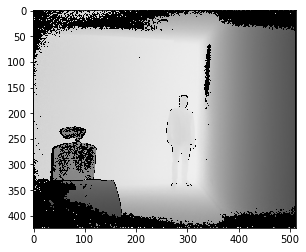

In [6]:
plt.imshow(dii)

In [7]:
x1 = int((cor[0] - cor[2]/2)*h)
y1 = int((cor[1] - cor[3]/2)*w)
x2 = int((cor[0] + cor[2]/2)*h)
y2 = int((cor[1] + cor[3]/2)*w)

In [11]:
x1,y1,x2,y2

(257, 164, 318, 345)

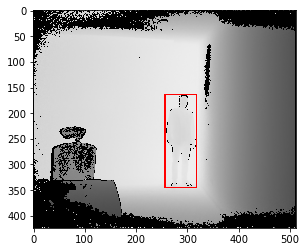

In [8]:
cv2.rectangle(dii, (x1,y1), (x2,y2), (255,0,0), 2)
plt.imshow(dii)
plt.show()